In [1]:
#import necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                   
#from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\Chinu\Downloads\auction.csv")

In [3]:
#Printing the first 5 rows of the Dataframe
df.head(5)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [4]:
#Printing the last 5 rows of the Dataframe
df.tail()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction
10680,8214889177,90.01,6.988831,gpgtpse,268.0,0.01,90.01,Xbox game console,7 day auction


In [5]:
#Checking the number of rows and columns in the dataframe
df.shape

(10681, 9)

In [6]:
#Verifying the data types of all attributes in the Dataframe
df.dtypes

auctionid         int64
bid             float64
bidtime         float64
bidder           object
bidderrate      float64
openbid         float64
price           float64
item             object
auction_type     object
dtype: object

In [7]:
#Checking for missing values
print(df.isnull().sum())

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64


There are missing values in the dataset. Therefore, it is important to handle these missing values before performaing data analysis. Here, we are dropping of the rows with missing values as there number is quite low.

In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
# Check for missing values again to confirm they have been handled
print(df.isnull().sum())

auctionid       0
bid             0
bidtime         0
bidder          0
bidderrate      0
openbid         0
price           0
item            0
auction_type    0
dtype: int64


In [10]:
#Performing basic Exploratory Data Analysis 
print(df.describe())

          auctionid           bid       bidtime    bidderrate       openbid  \
count  1.065400e+04  10654.000000  10654.000000  10654.000000  10654.000000   
mean   4.125816e+09    207.936108      3.975270     31.982166     52.362645   
std    2.484587e+09    323.365733      2.353584    120.678898    168.650456   
min    1.638844e+09      0.010000      0.000567     -4.000000      0.010000   
25%    3.015329e+09     72.000000      1.947197      1.000000      1.000000   
50%    3.020455e+09    140.000000      4.132424      5.000000      4.990000   
75%    8.212122e+09    210.000000      6.443732     21.000000     50.000000   
max    8.215611e+09   5400.000000      6.999990   3140.000000   5000.000000   

              price  
count  10654.000000  
mean     335.637373  
std      433.939406  
min       26.000000  
25%      187.520000  
50%      229.040000  
75%      255.000000  
max     5400.000000  


# Data Visualizations

Number of unique auctions for different auction types

In [20]:
num_auction_type=df.groupby('auction_type')['auctionid'].nunique()
num_auction_type=num_auction_type.to_frame()
print(num_auction_type)

               auctionid
auction_type            
3 day auction        148
5 day auction         96
7 day auction        383


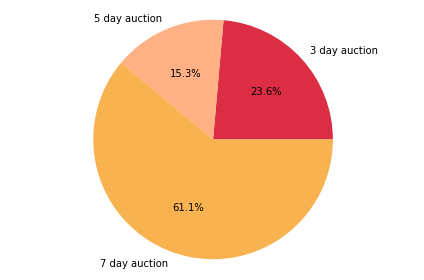

In [22]:
colors=['#DB2D43', '#FFB085','#F8B24F']
plt.pie(
    num_auction_type['auctionid'],
    labels=num_auction_type.index,
    shadow=False,
    colors=colors,
    autopct='%1.1f%%',
    )
plt.axis('equal')

plt.tight_layout()
plt.show()

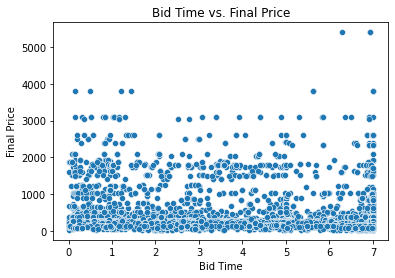

In [23]:
# Create a scatter plot of bid time vs. final price
sns.scatterplot(x='bidtime', y='price', data=df)

# Add labels and title
plt.xlabel('Bid Time')
plt.ylabel('Final Price')
plt.title('Bid Time vs. Final Price')
plt.show()

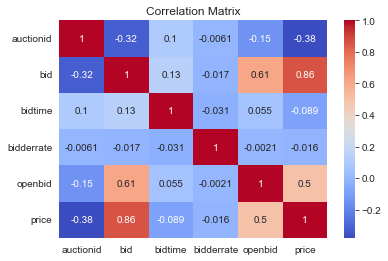

In [32]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix')
plt.show()

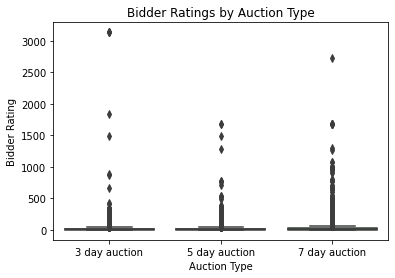

In [26]:
# Create a box plot of bidder ratings by auction type
sns.boxplot(x='auction_type', y='bidderrate', data=df)

# Add labels and title
plt.xlabel('Auction Type')
plt.ylabel('Bidder Rating')
plt.title('Bidder Ratings by Auction Type')
plt.show()

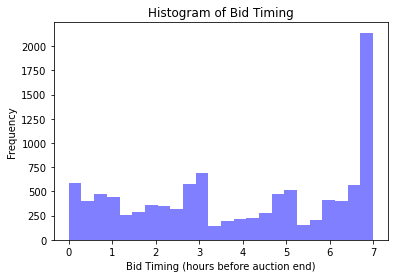

In [28]:
plt.hist(df['bidtime'], bins=24, alpha=0.5, color='blue')

# Add labels and title
plt.xlabel('Bid Timing (hours before auction end)')
plt.ylabel('Frequency')
plt.title('Histogram of Bid Timing')

# Show the plot
plt.show()

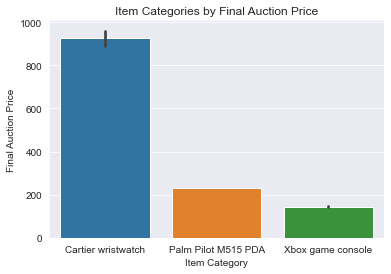

In [29]:
sns.set_style("darkgrid")

# create a bar chart of item categories by final auction price
sns.barplot(x="item", y="price", data=df)

# set labels and title
plt.xlabel("Item Category")
plt.ylabel("Final Auction Price")
plt.title("Item Categories by Final Auction Price")

# show the plot
plt.show()

In [ ]:
# Define the variables
x = df['bid']
y = df['price']

# Create the scatter plot
plt.scatter(x, y)

# Add labels
plt.xlabel('Bid')
plt.ylabel('Price')

# Show the plot
plt.show()

<AxesSubplot:xlabel='auction_type', ylabel='price'>

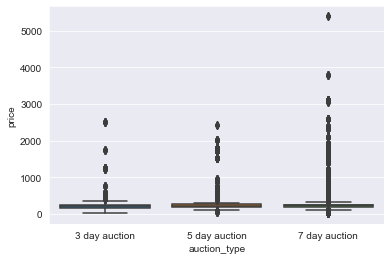

In [36]:
# visualize relationships between variables
sns.scatterplot(data=data, x='price', y='bid')
sns.boxplot(data=data, x='auction_type', y='price')

# Regression Analysis

In [46]:
import statsmodels.api as sm

In [47]:
X = df[['bid', 'bidtime', 'bidderrate', 'openbid']]
y = df['price']

X = sm.add_constant(X) # adding a constant term to the independent variables
model = sm.OLS(y, X).fit() # fitting the model

print(model.summary()) # printing the summary statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     9484.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:31:18   Log-Likelihood:                -71732.
No. Observations:               10654   AIC:                         1.435e+05
Df Residuals:                   10649   BIC:                         1.435e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.7810      4.005     60.127      0.0

# Cluster Analysis

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert item column to a matrix of numerical values using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['item'])

# Apply K-Means clustering to group similar items together
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Print top terms per cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: pilot pda palm m515 xbox wristwatch game console cartier
Cluster 1: xbox game console wristwatch pilot pda palm m515 cartier
Cluster 2: wristwatch cartier xbox pilot pda palm m515 game console
Cluster 3: xbox game console wristwatch pilot pda palm m515 cartier
Cluster 4: pilot pda palm m515 xbox wristwatch game console cartier


C:\Users\Chinu\AppData\Local\Temp\ipykernel_24288\3603545250.py:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
C:\Users\Chinu\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
